# Simple example of the evolutionary optimization framework

This notebook provides a simple example for the use of the evolutionary optimization framework builtin to the library. Under the hood, the implementation of the evolutionary algorithm is powered by `deap` and `pypet` cares about the parallelization and storage of the simulation data for us. 

Here we demonstrate how to fit parameters of a the evaluation function `optimize_me` which simply computes the distance of the parameters to the unit circle and returns this as the `fitness_tuple` that DEAP expects.

In [1]:
# change into root directory to the project
import os
os.chdir('..')

In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np

from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.evolution import Evolution

import neurolib.optimize.evolution.evolutionaryUtils as eu
import neurolib.utils.functions as func

import random

def optimize_me(traj):
    global evolution
    ind = evolution.getIndividualFromTraj(traj)
    print("Hello, I am {}".format(ind.id))
    print("You can also call me {}, or simply ({:.2}, {:.2}).".format(ind.params, ind.x, ind.y))
    
    # let's make a circle
    computation_result = abs((ind.x**2 + ind.y**2) - 1)
    # DEAP wants a tuple as fitness, ALWAYS!
    fitness_tuple = (computation_result ,)
    
    # we also require a dictionary with at least a single result for storing the results in the hdf
    result_dict = {"result" : [computation_result]}
    
    return fitness_tuple, result_dict

    
pars = ParameterSpace(['x', 'y'], [[-5.0, 5.0], [-5.0, 5.0]])
evolution = Evolution(optimize_me, pars, weightList = [-1.0], POP_INIT_SIZE=100, POP_SIZE = 50, NGEN=10)
evolution.run(verbose = False)

In [ ]:
traj = evolution.loadResults()

Parameters dictribution (Generation 9):
x: 	 mean: -0.09457,	 std: 0.627
y: 	 mean: -0.08836,	 std: 0.7557
There are 50 valid individuals
Mean score across population: -0.17


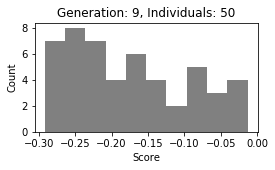

<Figure size 432x288 with 0 Axes>

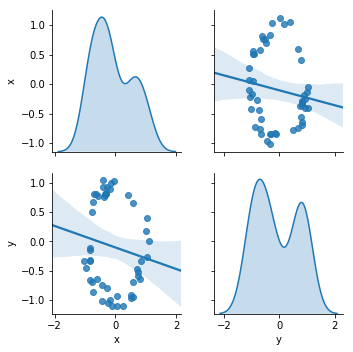

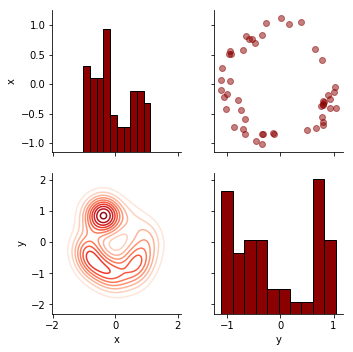

--------------------------
Best 20 individuals:
Printing 20 individuals
Individual 0 pars x -0.7476, y 0.6739
	Fitness values:  0.0131
Individual 1 pars x -0.4044, y 0.9257
	Fitness values:  0.0203
Individual 2 pars x -0.1289, y 1.003
	Fitness values:  0.0229
Individual 3 pars x -0.1714, y -0.999
	Fitness values:  0.0274
Individual 4 pars x -0.04557, y 1.027
	Fitness values:  0.0559
Individual 5 pars x -0.2568, y 0.9331
	Fitness values:  0.0634
Individual 6 pars x -0.7592, y -0.6988
	Fitness values:  0.0646
Individual 7 pars x 0.8081, y -0.6449
	Fitness values:  0.069
Individual 8 pars x -0.6422, y 0.8114
	Fitness values:  0.0707
Individual 9 pars x 1.021, y 0.1688
	Fitness values:  0.0712
Individual 10 pars x 0.7571, y -0.5929
	Fitness values:  0.0753
Individual 11 pars x -0.5594, y 0.7809
	Fitness values:  0.0773
Individual 12 pars x 0.05937, y -0.9433
	Fitness values:  0.1066
Individual 13 pars x 0.5114, y -0.9194
	Fitness values:  0.1068
Individual 14 pars x -0.6902, y 0.8081
	Fitn

In [26]:
evolution.info(plot=True)

Text(0, 0.5, 'Score')

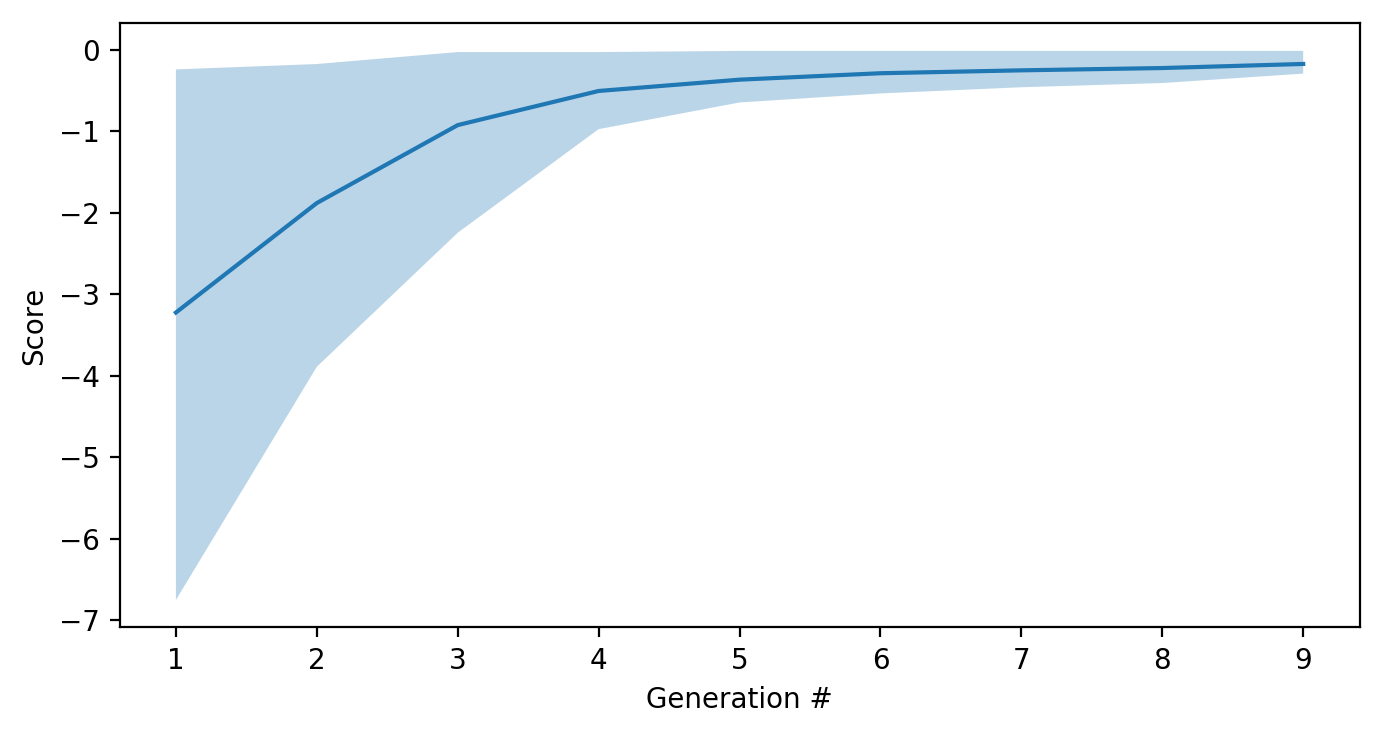

In [27]:
gens, all_scores = evolution.getScoresDuringEvolution()

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4), dpi=200)   
plt.plot(gens, np.nanmean(all_scores, axis=1))
plt.fill_between(gens, np.nanmin(all_scores, axis=1), np.nanmax(all_scores, axis=1), alpha=0.3)
plt.xlabel("Generation #")
plt.ylabel("Score")